# Tensor Flow Basics -  Regression using  Estimator API

Tensorflow have two regressor API
  - Linear Regressor
  - DNN Regressor

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.13.0-rc1


<h2>Read data</h2>

In [2]:
CSV_COLUMNS = ['X', 'Y']
FEATURES = CSV_COLUMNS[0:len(CSV_COLUMNS)-1]
LABEL = CSV_COLUMNS[1]


df_train = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')
df_valid = pd.read_csv('../input/LinearRegressionDS/LinearRegressionValidData.csv')
df_test = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTestData.csv')

In [3]:
df_train.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


In [4]:
df_test.head()

,X,Y
0,-33.318004,3.316890
1,-37.912164,5.397690
2,-51.206938,0.130430
3,-6.132596,6.192598
4,21.261183,17.088487


# Helper Functions

In [5]:
def make_feature_cols():
  input_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
  return input_columns

In [6]:
def make_train_input_fn(df, num_epochs):
  return tf.estimator.inputs.pandas_input_fn(
    x = df,
    y = df[LABEL],
    batch_size = 128,
    num_epochs = num_epochs,
    shuffle = True,
    queue_capacity = 1000
  )
def make_eval_input_fn(df):
  return tf.estimator.inputs.pandas_input_fn(
    x = df,
    y = df[LABEL],
    batch_size = 128,
    shuffle = False,
    queue_capacity = 1000
  )
def make_predict_input_fn(df):
  return tf.estimator.inputs.pandas_input_fn(
    x = df,
    y = None,
    batch_size = 128,
    shuffle = False,
    queue_capacity = 1000
  )

In [7]:
def print_rmse(model, df):
  print('RMSE on dataset = {}'.format(get_rmse(model, df)))
  

In [8]:
def get_rmse(model, df):
  metrics = model.evaluate(input_fn = make_eval_input_fn(df))
  return np.sqrt(metrics['average_loss'])

In [9]:
def predict(model,df):   
    predictions =  model.predict(input_fn =make_predict_input_fn(df))
    t=[]
    for items in predictions:
        t.append(items['predictions'])

    Py=np.asarray(t )
    Py=np.squeeze(Py)
    Py=Py.reshape((len(Py),1))
    return Py

# Linear Regressor

In [10]:


tf_feature_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
tf_input_train=make_train_input_fn(df_train, num_epochs=50000)
tf_input_valid=make_eval_input_fn(df_valid)
tf_input_test=make_predict_input_fn(df_test)


### Training

In [11]:
model = tf.estimator.LinearRegressor(feature_columns = make_feature_cols())
retvalue= model.train(input_fn =tf_input_train)

### Evaluating 

In [12]:
print_rmse(model,df_valid)

RMSE on dataset = 7.674804210662842


### Predicting

In [13]:
Py=predict(model,df_train)
print(Py)

[[ 7.142713  ]
 [ 2.3130674 ]
 [26.191395  ]
 [26.667421  ]
 [-4.5957575 ]
 [ 9.699028  ]
 [18.560509  ]
 [ 0.28371334]
 [13.474175  ]
 [-3.2527647 ]
 [15.529499  ]
 [21.284796  ]]


### Plotting

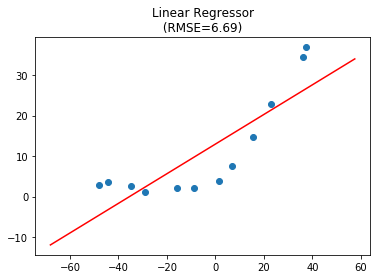

In [14]:
df=df_train.values 
X=df[:,0:1]
Y=df[:,1:2]
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min() - 20, X[:, 0].max() + 20
lineX = np.linspace(x_min, x_max, 100)
lineX.shape=(len(lineX),1)
np_line=np.column_stack((lineX,lineX))
df_line= pd.DataFrame(data=np_line, columns=['X','Y'])
Py=predict(model,df_line)
plt.plot(lineX, Py,color='r')
plt.title('Linear Regressor\n (RMSE={:.2f}) '.format(get_rmse(model,df_train)))
plt.show()

# Deep Neural Network(DNN) Regressor

In [15]:
tf_feature_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
tf_input_train=make_train_input_fn(df_train, num_epochs=50000)
tf_input_valid=make_eval_input_fn(df_valid)
tf_input_test=make_predict_input_fn(df_test)

### Training

In [16]:
modelDNN = tf.estimator.DNNRegressor(hidden_units = [20,16, 8,3],feature_columns = tf_feature_columns)
retvalue= modelDNN.train(input_fn = tf_input_train)

### Evaluating 

In [17]:
print_rmse(modelDNN,df_valid)

RMSE on dataset = 4.655484199523926


### Predicting

In [18]:
Py=predict(modelDNN,df_train)
print(Py)

[[ 2.1314695]
 [ 1.7084317]
 [35.139084 ]
 [36.392254 ]
 [ 3.3799672]
 [ 2.1288717]
 [15.050411 ]
 [ 2.199418 ]
 [ 3.7445524]
 [ 3.0550408]
 [ 7.637591 ]
 [22.22223  ]]


### Plotting

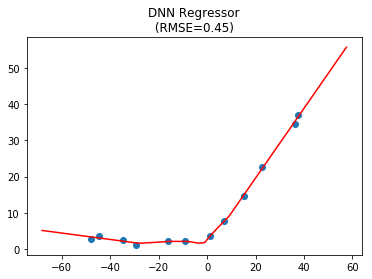

In [19]:
df=df_train.values 
X=df[:,0:1]
Y=df[:,1:2]
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min() - 20, X[:, 0].max() + 20
lineX = np.linspace(x_min, x_max, 100)
lineX.shape=(len(lineX),1)
np_line=np.column_stack((lineX,lineX))
df_line= pd.DataFrame(data=np_line, columns=['X','Y'])
Py=predict(modelDNN,df_line)
plt.plot(lineX, Py,color='r')
plt.title('DNN Regressor\n (RMSE={:.2f}) '.format(get_rmse(modelDNN,df_train)))
plt.show()